# Logistic Regression

In this project we will be working with a fake advertising data set, indicating whether or 
not a particular internet user clicked on an Advertisement on a company website. We will try 
to create a model that will predict whether or not they will click on an ad based off the 
features of that user.

This data set contains the following features:
    
**'Daily Time Spent on Site'**: consumer time on site in minutes<br>
**'Age'**: cutomer age in years<br>
**'Area Income'**: Avg. Income of geographical area of consumer<br>
**'Daily Internet Usage'**: Avg. minutes a day consumer is on the internet<br>
**'Ad Topic Line'**: Headline of the advertisement<br>
**'City'**: City of consumer<br>
**'Male'**: Whether or not consumer was male<br>
**'Country'**: Country of consumer<br>
**'Timestamp'**: Time at which consumer clicked on Ad or closed window<br>
**'Clicked on Ad'**: 0 or 1 indicated clicking on Ad<br>

In [1]:
# Library imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Data load, validation

In [3]:
# Load from csv file
advertising = pd.read_csv("/Users/suvosmac/OneDrive/Documents/ML-Datasets/ML-Bootcamp/advertising.csv")

advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
# Check on the data sturucture
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
# Check on the summary statistics
advertising.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
# Check whether presence of any missing values
advertising.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

There are no missing values in the dataset

### Exploratory Data Analysis

1    500
0    500
Name: Clicked on Ad, dtype: int64

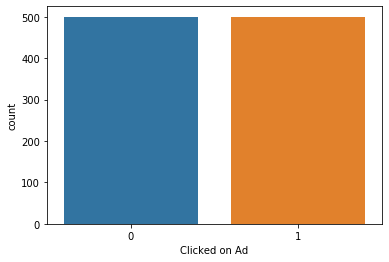

In [8]:
# Explore the response variable

sns.countplot(advertising['Clicked on Ad'])
advertising['Clicked on Ad'].value_counts()

There are equal proportion of both response categories

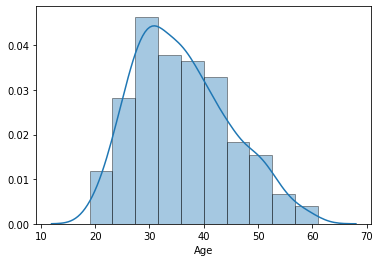

In [13]:
# Let us Explore the age variable
sns.distplot(advertising['Age'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)

Although the max age is 70, most of the population lies below age 40

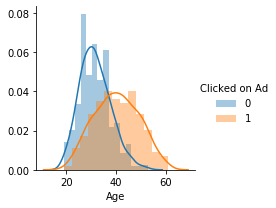

In [31]:
# If we observe the distribution of age by response variable

g = sns.FacetGrid(data=advertising, hue='Clicked on Ad')
g.map(sns.distplot, 'Age').add_legend()

The average age of individuals who have clicked on Ad is higher than the average age of individual who has not
clicked on Ad

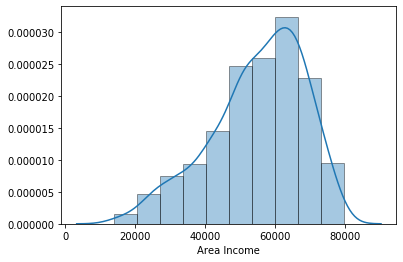

In [14]:
# Explore variable income
sns.distplot(advertising['Area Income'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)

Majority population is at a high average income brackets

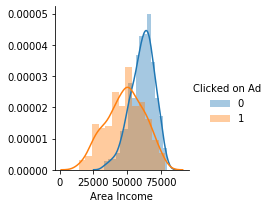

In [29]:
# We observe the distribution of income by response variable

g = sns.FacetGrid(data=advertising, hue='Clicked on Ad')
g.map(sns.distplot, 'Area Income').add_legend()

We see the average income of people who gas clicked in Ad is lower than the average income of people who have not
clicked on the Ad

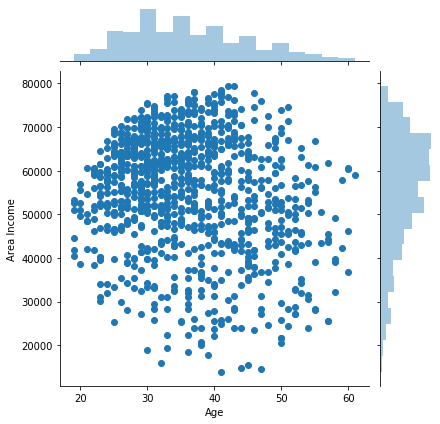

In [21]:
# Lets do a jointplot between Age vs Area income

sns.jointplot(x='Age', y='Area Income', data=advertising)

There are no visible relationships between the variables. Higher income group exists across age groups

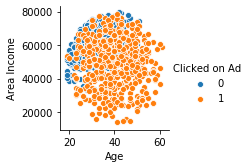

In [32]:
# We visualise the above by response variable

sns.pairplot(data=advertising, x_vars='Age', y_vars='Area Income', hue='Clicked on Ad')

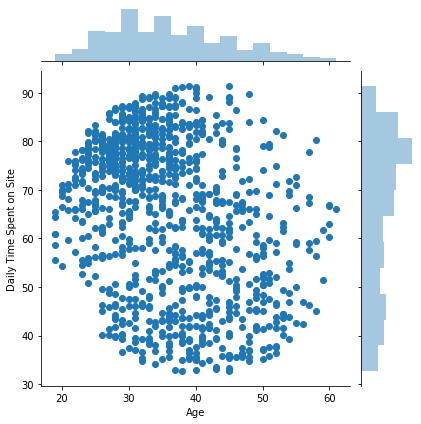

In [34]:
# We Explore the variable Daily Time Spent on site by Age

sns.jointplot(x='Age', y='Daily Time Spent on Site', data=advertising)

Most of the people spending higher time on Site, belongs to the lower age groups

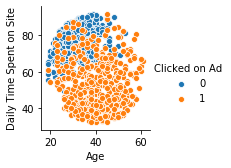

In [35]:
sns.pairplot(data=advertising, x_vars='Age', y_vars='Daily Time Spent on Site', hue='Clicked on Ad')

Most of the people who have clicked on Ad have spent lesser time on Websites

/Users/suvosmac/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/suvosmac/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


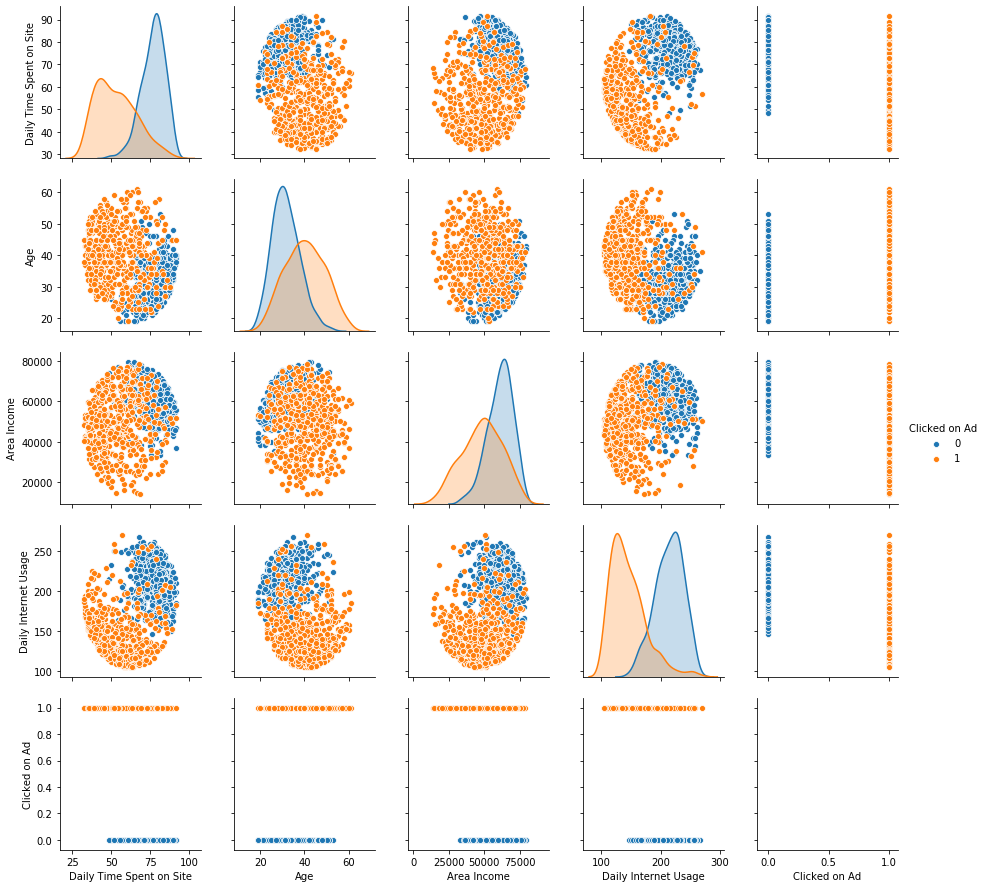

In [53]:
# We will observe the entire dataset attributes by response variable

sns.pairplot(data=advertising[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage',
                              'Clicked on Ad']], hue='Clicked on Ad')

### Seggregate features and target variable and perform a train, test split

In [48]:
features = advertising[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']]
target = advertising['Clicked on Ad']

from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3,
                                                                            random_state=101)

### Model Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver='lbfgs')
logmodel.fit(features_train, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Model Predictions and Evaluation

In [56]:
predictions = logmodel.predict(features_test)

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Confusion Matrix")
print(confusion_matrix(target_test, predictions))
print("\n")
print("Accuracy Score")
print(accuracy_score(target_test, predictions))
print("\n")
print("Classification Report")
print(classification_report(target_test, predictions))

Confusion Matrix
[[149   8]
 [ 14 129]]


Accuracy Score
0.9266666666666666


Classification Report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



### Alternate Approach using statsmodels

In [59]:
import statsmodels.api as sm

# We will run the logit model
logit = sm.Logit(target_train, features_train)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.281748
         Iterations 7


In [60]:
# Let us view the result summary
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Clicked on Ad   No. Observations:                  700
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            4
Date:                Sun, 25 Aug 2019   Pseudo R-squ.:                  0.5934
Time:                        23:02:05   Log-Likelihood:                -197.22
converged:                       True   LL-Null:                       -485.06
Covariance Type:            nonrobust   LLR p-value:                2.842e-123
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Daily Time Spent on Site    -0.0511      0.009     -5.569      0.000      -0.069      -0.033
Age                          0.2363      0.018     13.077      0.000       0.201       0.272
Area Income              -9.888e-06   9.23e-06     -1.071      0.284    -2.8e-05     8.2e-06
Daily Internet Usage        -0.0247      0.004     -6.896      0.000      -0.032      -0.018
Male                        -0.0176      0.261     -0.067      0.946      -0.529       0.494
============================================================================================
"""

We see whether or not the consumer is Male is not statistically signifgicant in making the predictions, so dropping
that feature and re-run the model. Also dropping the Area Income, as statistical significance is comparitively
low

In [74]:
features = advertising[['Daily Time Spent on Site', 'Age', 'Daily Internet Usage']]
target = advertising['Clicked on Ad']

from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3,
                                                                            random_state=101)

In [75]:
logit = sm.Logit(target_train, features_train)
result = logit.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.282578
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Clicked on Ad   No. Observations:                  700
Model:                          Logit   Df Residuals:                      697
Method:                           MLE   Df Model:                            2
Date:                Sun, 25 Aug 2019   Pseudo R-squ.:                  0.5922
Time:                        23:19:18   Log-Likelihood:                -197.80
converged:                       True   LL-Null:                       -485.06
Covariance Type:            nonrobust   LLR p-value:                1.759e-125
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Daily Time Spent on Site    -0.0533      0.009     -5.959      0.000      -0.071

In [76]:
# Confidence interval gives you an idea for how robust the coefficients of the model are

print(result.conf_int())

                                 0         1
Daily Time Spent on Site -0.070885 -0.035795
Age                       0.197452  0.263828
Daily Internet Usage     -0.032571 -0.019240


In [77]:
# We will now do predictions and concat the result with the original dataset

prob = result.predict(features_test)
diagDf = pd.concat([features_test, prob, target_test], axis=1)

In [78]:
diagDf.rename(columns={0: 'Prob'}, inplace=True)

# Check the data frame
diagDf.head()

,Daily Time Spent on Site,Age,Daily Internet Usage,Prob,Clicked on Ad
545,42.60,55,168.29,0.997655,1
298,80.39,31,214.74,0.062907,0
109,74.02,32,210.54,0.116921,0
837,55.77,49,117.33,0.994969,1
194,77.20,33,254.05,0.043603,0


#### Visualizations on the Predictions

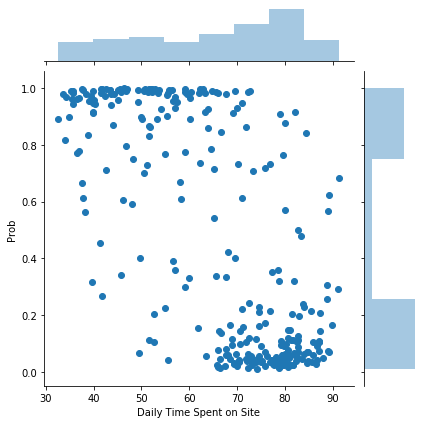

In [79]:
sns.jointplot(x='Daily Time Spent on Site', y='Prob', data=diagDf)

As the daily time spent on site increases, probability decreases

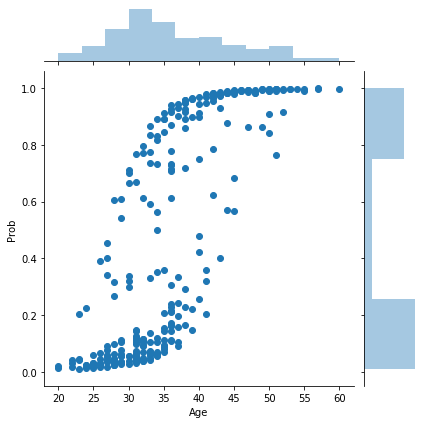

In [80]:
sns.jointplot(x='Age', y='Prob', data=diagDf)

As the age increases, the probability of clicking on the Ad increases

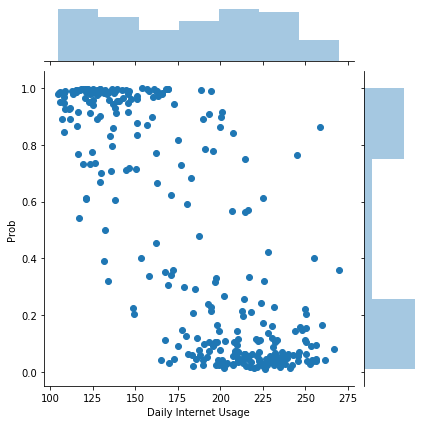

In [81]:
sns.jointplot(x='Daily Internet Usage', y='Prob', data=diagDf)

As the daily internet usage increases, probability decreases